In [ ]:
HOUSING: PRICE PREDICTION

Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.



Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file


SyntaxError: ignored

**Train Dataset:**
This dataset will be used to train the model on the provided features.
Target variable SalesPrice is given in the dataset which need to be predicted.

**Test Dataset:**
This dataset will be used to predict the SalesPrice for the given data.


### Importing Libraries

In [1]:
import pandas as pd 
import random
import numpy as np

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams["font.size"]=24

import seaborn as sns

sns.set(font_scale=2)

from IPython.core.pylabtools import figsize

#SkLearn
from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import LabelEncoder


#Ignore all the warnings        
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
test_data_url = 'https://raw.githubusercontent.com/MrTanbirSingh/Housing-Project-20220615/main/test.csv'
train_data_url = 'https://raw.githubusercontent.com/MrTanbirSingh/Housing-Project-20220615/main/train.csv'

Fetching train and test dataset from Github

In [3]:
df_train_backup = pd.DataFrame(pd.read_csv(train_data_url))
df_train = df_train_backup.copy()

df_test_backup = pd.DataFrame(pd.read_csv(test_data_url))
df_test = df_test_backup.copy()

##### Data Shuffling

In [4]:
df_train = df_train.sample(frac = 1)
df_test = df_test.sample(frac = 1)

Shuffle function is used to avoid model to learn anything based on the order of the data presented.

### Understanding Data

#### Size of data


In [5]:
print('Train Dataset Size:',df_train.shape)

Train Dataset Size: (1168, 81)


In [6]:
print('Test Dataset Size:',df_test.shape)

Test Dataset Size: (292, 80)


#### How data look

In [7]:
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1142,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000
439,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
477,741,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2007,WD,Abnorml,132000
97,1419,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,COD,Normal,124000
677,1337,90,RL,87.0,9246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,135000


#### Columns Data type

Train data

In [8]:
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 942 to 570
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overall

There are 3 'float; dtype columns, 35 'int' data type column and 43 'object' type columns.</br>Most of the columns are of Object dtype which needs to converted to the integer type columns using LabelEncoder from the sklearn library. 

Test data

In [9]:
df_test.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 100 to 204
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallC

#### Missing Values

##### Missing values TRAIN dataset

Concatinating the train and test data together and checking the missing values and treating accourdingly

In [10]:
# train_test = pd.concat((df_train,df_test),axis=0)
# train_test.reset_index(inplace=True, drop = True)

In [11]:
# len(train_test.columns)

In [12]:
#Removing ID columns, It is not important for this prediction.
df_train.drop('Id',inplace = True, axis = 1)

In [13]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

There are alot of missing values which need to be treated.

plotting all the missing values in the graph



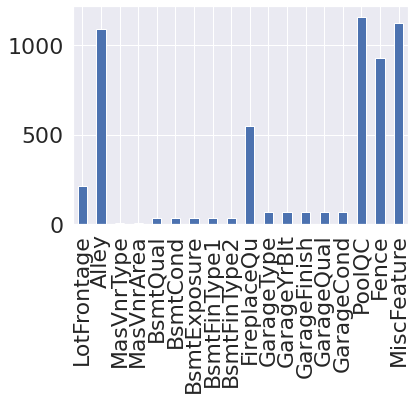

In [14]:
df_na = df_train.isnull().sum()
df_na = df_na[df_na.values > 0]
df_na.plot(kind='bar')

- Checking which columns have missing values more than `30%`

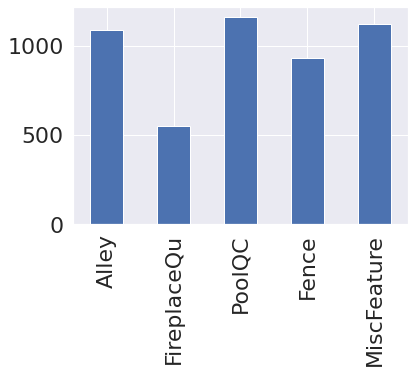

In [15]:
df_na = df_train.isnull().sum()
df_na = df_na[df_na.values > df_train.shape[0]*0.3]
df_na.plot(kind='bar')

**Alley, FireplaceQu, PoolQC, Fence and MiscFeature** has more than 30% of missing values which is not good for training model and it is not possible to fill these missing values.

- Removing <font color='red'> Alley, FireplaceQu, PoolQC, Fence, MiscFeature 
</font> columns due to huge missing values

In [16]:
df_train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1, inplace = True)

In [17]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()


LotFrontage     214
MasVnrType        7
MasVnrArea        7
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageQual       64
GarageCond       64
dtype: int64

###### Filling missing values in <font color= 'blue'>LotFrontage</font>

From domain knowledge and analysing data found that the LotFrontage has relationship with LotArea which can be used to fill null values.</br>
- LotFrontage lies between 0.05 to 0.1 percent of LotArea


In [18]:
df_train.LotFrontage = df_train.LotFrontage.apply(
    lambda x: int(df_train.LotArea.sample(n=1).to_numpy()[0]
    / 1000
    * (np.random.randint(5, 10)
    ))
    if pd.isna(x)
    else x ).astype('int')

###### Missing values Garage
1.   GarageType
2.   GarageYrBlt
3.   GarageFinish
4.   GarageQual
5.   GarageCond
- Have to fill all these missing values.

In [19]:
df_train['GarageCond'] = df_train['GarageCond'].fillna('TA')


1. <font color = 'blue'>GarageType</font>

In [20]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

MasVnrType       7
MasVnrArea       7
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinType2    31
GarageType      64
GarageYrBlt     64
GarageFinish    64
GarageQual      64
dtype: int64

In [21]:
df_train.GarageType.value_counts(normalize=True)

Attchd     0.625906
Detchd     0.284420
BuiltIn    0.063406
Basment    0.014493
CarPort    0.007246
2Types     0.004529
Name: GarageType, dtype: float64

In [22]:
ratio = df_train.GarageType.value_counts(normalize = True).values
val = df_train.GarageType.value_counts(normalize = True).index
nan_value = df_train.GarageType.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_train['GarageType'].isna().sum():
    count[0] += nan_value - df_train['GarageType'].isna().sum()
# if count.sum() == df_train['GarageType'].isna().sum():
for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_train.GarageType = df_train.GarageType.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

In [23]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

MasVnrType       7
MasVnrArea       7
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinType2    31
GarageYrBlt     64
GarageFinish    64
GarageQual      64
dtype: int64

2. <font color = 'blue'>GarageYrBlt</font>

Data type of this column was object. But this column had the integer data in it.
- changing data type 
- filling missing data

In [24]:
print(np.dtype(df_train.GarageYrBlt))
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(df_train.GarageYrBlt.notnull())
print(np.dtype(df_train.GarageYrBlt))
df_train.GarageYrBlt = df_train.GarageYrBlt.astype('float')
print(np.dtype(df_train.GarageYrBlt))

float64
object
float64


3. <font color = 'blue'>GarageFinish</font>

In [25]:
ratio = df_train.GarageFinish.value_counts(normalize = True).values
val = df_train.GarageFinish.value_counts(normalize = True).index
nan_value = df_train.GarageFinish.isna().sum()

count = (nan_value * ratio).round()
output = []
if count.sum() == df_train['GarageFinish'].isna().sum():
    for i,c in zip(val, count):
      output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_train.GarageFinish = df_train.GarageFinish.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

4. <font color = 'blue'>GarageQual</font>

Filling missing values with the most frequently occured values

In [26]:
df_train.GarageQual.value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [27]:
df_train.GarageQual = df_train.GarageQual.fillna('TA')

5. <font color = 'blue'>GarageCond</font>

In [28]:
df_train.GarageCond.value_counts()

TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [29]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

MasVnrType       7
MasVnrArea       7
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinType2    31
dtype: int64

filling missing values with the most frequestly occuring values<font color= 'blue'> TA </font>

In [30]:
df_train.GarageCond = df_train.GarageCond.fillna('TA')

###### Bsmt columns

In [31]:
df_train.BsmtQual.value_counts(normalize = True)

TA    0.454306
Gd    0.437610
Ex    0.082601
Fa    0.025483
Name: BsmtQual, dtype: float64

there is not dominent value so these missing values will be filled with distribution of ratio.

In [32]:
ratio = df_train.BsmtQual.value_counts(normalize = True).values
val = df_train.BsmtQual.value_counts(normalize = True).index
nan_value = df_train.BsmtQual.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_train['BsmtQual'].isna().sum():
    count[0] += nan_value - df_train['BsmtQual'].isna().sum()
# if count.sum() == df_train['BsmtQual'].isna().sum():
for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_train.BsmtQual = df_train.BsmtQual.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

Filling value in <font color='blue'>BsmtCond</font>

In [33]:
df_train.BsmtCond.value_counts(normalize = True)

TA    0.914763
Gd    0.049209
Fa    0.034271
Po    0.001757
Name: BsmtCond, dtype: float64

- In this column TA value is most frequestly occured and the ratio is 91%

In [34]:
df_train.BsmtCond = df_train.BsmtCond.fillna('TA')

Filling values in <font color = 'Blue'>BsmtExposure</font>

In [35]:
df_train.BsmtExposure.value_counts(normalize = True)

No    0.664908
Av    0.158311
Gd    0.094987
Mn    0.081794
Name: BsmtExposure, dtype: float64

In [36]:
ratio = df_train.BsmtExposure.value_counts(normalize = True).values
val = df_train.BsmtExposure.value_counts(normalize = True).index
nan_value = df_train.BsmtExposure.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_train['BsmtExposure'].isna().sum():
    count[0] += nan_value - df_train['BsmtExposure'].isna().sum()
    
for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_train.BsmtExposure = df_train.BsmtExposure.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

Filling values in <font color = 'Blue'>BsmtFinType1</font>

In [37]:
df_train.BsmtFinType1.value_counts(normalize = True)

Unf    0.303163
GLQ    0.289982
ALQ    0.152900
BLQ    0.106327
Rec    0.095782
LwQ    0.051845
Name: BsmtFinType1, dtype: float64

Ratio of data is distributed, no dominant values.

In [38]:
ratio = df_train.BsmtFinType1.value_counts(normalize = True).values
val = df_train.BsmtFinType1.value_counts(normalize = True).index
nan_value = df_train.BsmtFinType1.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_train['BsmtFinType1'].isna().sum():
    count[0] += nan_value - df_train['BsmtFinType1'].isna().sum()
    
for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_train.BsmtFinType1 = df_train.BsmtFinType1.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

Filling values in <font color = 'Blue'>BsmtFinType2</font>

In [39]:
df_train.BsmtFinType2.value_counts(normalize = True)

Unf    0.881266
Rec    0.037819
LwQ    0.035180
BLQ    0.021108
ALQ    0.014072
GLQ    0.010554
Name: BsmtFinType2, dtype: float64

Unf value is the dominant value in this column and the distribution ratio is 88%.
- filling Na values with Unf

In [40]:
df_train.BsmtFinType2 = df_train.BsmtFinType2.fillna('Unf')

###### MasVnr column

Filling values in <font color = 'Blue'>MasVnrType<Font>

In [41]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

MasVnrType    7
MasVnrArea    7
dtype: int64

filling values with dominant value

In [42]:
df_train.MasVnrType.value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [43]:
df_train.MasVnrType = df_train.MasVnrType.fillna('None')

In [44]:
df_train.MasVnrArea.value_counts()

0.0       692
72.0        7
180.0       6
120.0       6
80.0        5
         ... 
1115.0      1
651.0       1
333.0       1
102.0       1
491.0       1
Name: MasVnrArea, Length: 283, dtype: int64

Filling values in <font color = 'Blue'>MasVnrArea<Font>

In [45]:
df_train.MasVnrArea.value_counts()

0.0       692
72.0        7
180.0       6
120.0       6
80.0        5
         ... 
1115.0      1
651.0       1
333.0       1
102.0       1
491.0       1
Name: MasVnrArea, Length: 283, dtype: int64

If the value of MasVnrType column is None then the value of MasVnrArea columns value is 0.
- filled MasVnrType values with None. Accordingly have to fill 0 in MasVnrArea values

In [46]:
df_train.MasVnrArea = df_train.MasVnrArea.fillna(0)

In [47]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

Series([], dtype: float64)

All The Missing values has been treated

##### Missing Values TEST dataset







While filling the missing values in the test data we have to take care of the following:
- Everything which is done on the Train.csv data must be done on the Test.csv data.</br>
- Same changes must apply on test data For Example: Drop columns, filling data based on the percetage of preset data and more.

Droping <font color = 'Blue'>Id</font> column as it is not important for the sales prediction

In [48]:
#Removing ID columns, It is not important for this prediction.
df_test.drop('Id',inplace = True, axis = 1)

- Checking which column contains missing values

In [49]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

LotFrontage      45
Alley           278
MasVnrType        1
MasVnrArea        1
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinType2      7
Electrical        1
FireplaceQu     139
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
GarageCond       17
PoolQC          292
Fence           248
MiscFeature     282
dtype: int64

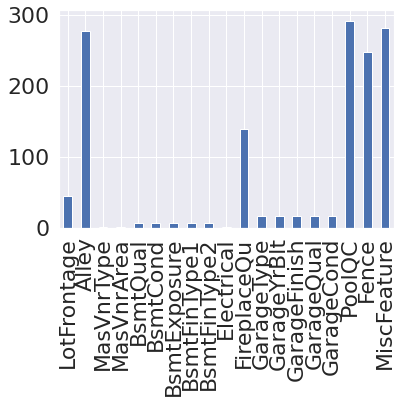

In [50]:
df_na = df_test.isnull().sum()
df_na = df_na[df_na.values > 0]
df_na.plot(kind='bar')

In [51]:
df_test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1, inplace = True)

Most of the missing values are in **Alley, PoolQC, Fence, MiscFeature and FireplaceQu** columns.

###### Filling <font color= 'blue'>LotFrontage</font>
From domain knowledge and analysing data found that the LotFrontage has relationship with LotArea which can be used to fill null values.</br>
- LotFrontage lies between 0.05 to 0.1 percent of LotArea


In [52]:
df_test.LotFrontage = df_test.LotFrontage.apply(
    lambda x: int(df_test.LotArea.sample(n=1).to_numpy()[0]
    / 1000
    * (np.random.randint(5, 10)
    ))
    if pd.isna(x)
    else x ).astype('int')

###### Missing values Garage

1. <font color = 'blue'>GarageCond</font>

In [53]:
df_test['GarageCond'] = df_test['GarageCond'].fillna('TA')

2. <font color = 'blue'>GarageType</font>

In [54]:
ratio = df_test.GarageType.value_counts(normalize = True).values
val = df_test.GarageType.value_counts(normalize = True).index
nan_value = df_test.GarageType.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_test['GarageType'].isna().sum():
    count[0] += nan_value - df_test['GarageType'].isna().sum()

for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_test.GarageType = df_test.GarageType.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

3. <font color = 'blue'>GarageYrBlt</font>

In [55]:
df_test.GarageYrBlt = df_test.GarageYrBlt.apply(
    lambda x: df_test.GarageYrBlt
                  if pd.isna(x)
                  else x )

#changing dtype of the column
df_test.GarageYrBlt = pd.to_numeric(df_test.GarageYrBlt, errors='coerce')

4. <font color = 'blue'>GarageFinish</font>

In [56]:
ratio = df_test.GarageFinish.value_counts(normalize = True).values
val = df_test.GarageFinish.value_counts(normalize = True).index
nan_value = df_test.GarageFinish.isna().sum()

count = (nan_value * ratio).round()
output = []
if count.sum() == df_test['GarageFinish'].isna().sum():
    for i,c in zip(val, count):
      output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_test.GarageFinish = df_test.GarageFinish.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

5. <font color = 'blue'>GarageQual</font>

In [57]:
df_test.GarageQual = df_test.GarageQual.fillna('TA')

6. <font color = 'blue'>GarageCond</font>

In [58]:
df_test.GarageCond = df_test.GarageCond.fillna('TA')

In [59]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()


MasVnrType       1
MasVnrArea       1
BsmtQual         7
BsmtCond         7
BsmtExposure     7
BsmtFinType1     7
BsmtFinType2     7
Electrical       1
GarageYrBlt     17
dtype: int64

###### Filling <font color = 'blue'>Bsmt columns</font>

1. <font color = 'blue'>BsmtQual</font>

In [60]:
ratio = df_test.BsmtQual.value_counts(normalize = True).values
val = df_test.BsmtQual.value_counts(normalize = True).index
nan_value = df_test.BsmtQual.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_test['BsmtQual'].isna().sum():
    count[0] += nan_value - df_test['BsmtQual'].isna().sum()

for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_test.BsmtQual = df_test.BsmtQual.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

2. <font color = 'blue'>BsmtCond</font>

In [61]:
df_test.BsmtCond = df_test.BsmtCond.fillna('TA')

3. <font color = 'blue'>BsmtExposuor</font>

In [62]:
ratio = df_test.BsmtExposure.value_counts(normalize = True).values
val = df_test.BsmtExposure.value_counts(normalize = True).index
nan_value = df_test.BsmtExposure.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_test['BsmtExposure'].isna().sum():
    count[0] += nan_value - df_test['BsmtExposure'].isna().sum()
    
for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_test.BsmtExposure = df_test.BsmtExposure.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

4. <font color = 'blue'>BsmtFinType1</font>

In [63]:
ratio = df_test.BsmtFinType1.value_counts(normalize = True).values
val = df_test.BsmtFinType1.value_counts(normalize = True).index
nan_value = df_test.BsmtFinType1.isna().sum()

count = (nan_value * ratio).round()
output = []

if count.sum() != df_test['BsmtFinType1'].isna().sum():
    count[0] += nan_value - df_test['BsmtFinType1'].isna().sum()
    
for i,c in zip(val, count):
  output += [i] * int(c)
output = pd.Series(output).sample(frac = 1)

df_test.BsmtFinType1 = df_test.BsmtFinType1.apply(
    lambda x: output.sample(n=1).to_numpy()[0]
    if pd.isna(x)
    else x )

5. <font color = 'blue'>BsmtFinType2</font>

In [64]:
df_test.BsmtFinType2 = df_test.BsmtFinType2.fillna('Unf')

In [65]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

MasVnrType      1
MasVnrArea      1
Electrical      1
GarageYrBlt    17
dtype: int64

###### MasVnr column

Filling values in <font color = 'Blue'>MasVnrType<Font>

In [66]:
df_test.MasVnrType = df_test.MasVnrType.fillna('None')

Filling values in <font color = 'Blue'>MasVnrArea<Font>

In [67]:
df_test.MasVnrArea = df_test.MasVnrArea.fillna(0)

- checking how many missing values are still present in the data

In [68]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

Electrical      1
GarageYrBlt    17
dtype: int64

In [69]:
df_test.Electrical.value_counts()

SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

- filling missing value with dominant value

In [70]:
df_test.Electrical = df_test.Electrical.fillna('SBrkr')

All the missing values have been filled

In [71]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

GarageYrBlt    17
dtype: int64

#### Mathameticall Representation

In [72]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,71.083904,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,26.986838,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,8.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,58.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,82.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### LE

##### LE_train

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 942 to 570
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   int64  
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRem

In [74]:
le = LabelEncoder()

#saving object type columns into the list
train_obj_columns = [i for i in df_train.columns if np.dtype(df_train[i]) == np.dtype('O')]

count = 0
for i in train_obj_columns:
  try:
    df_train.insert(df_train.columns.get_loc(f'{i}')+1,column = f"LE_{i}", value = le.fit_transform(df_train[i]))
    count += 1
  except:
    print('skipping: ',i)

#taking all the numerical columns
df_train_le = df_train.copy()
df_train = df_train[[i for i in df_train.columns if np.dtype(df_train[i]) != np.dtype('O')]]

- All the numerical columns are in **df_train** dataframe after using LabelEncoder.
- **df_train_le** has all the numercal, object and numerical to object converted columns.

In [75]:
df_train

,MSSubClass,LE_MSZoning,LotFrontage,LotArea,LE_Street,LE_LotShape,LE_LandContour,LE_Utilities,LE_LotConfig,LE_LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LE_SaleType,LE_SaleCondition,SalePrice
942,60,3,94,9130,1,3,3,0,4,0,...,0,0,0,0,0,7,2008,8,4,173000
1002,60,3,196,7685,1,0,3,0,4,0,...,0,0,0,0,0,5,2006,8,4,165600
100,120,3,41,5330,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,251000
1145,90,3,94,9400,1,3,2,0,0,0,...,0,0,0,0,0,4,2010,8,4,139000
1161,60,3,75,10762,1,0,3,0,1,0,...,0,0,0,0,0,5,2009,8,4,225000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,20,3,93,15306,1,0,1,0,0,0,...,0,0,0,0,0,5,2007,6,5,283463
535,20,3,75,9750,1,3,3,0,4,0,...,275,0,0,0,500,4,2007,0,4,157900
1038,50,3,104,159000,1,1,2,0,1,2,...,0,0,0,0,500,6,2007,8,4,277000
479,20,3,75,14559,1,3,3,0,4,0,...,0,0,168,0,2000,6,2009,8,4,164900


##### LE_test

In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 100 to 204
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    int64  
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemo

In [77]:
#saving object type columns into the list
test_obj_columns = [i for i in df_test.columns if np.dtype(df_test[i]) == np.dtype('O')]


for i in test_obj_columns:
  df_test.insert(df_test.columns.get_loc(f'{i}')+1, column = f"LE_{i}", value = le.fit_transform(df_test[i]))


#taking all the numerical columns
df_test_le = df_test.copy()
df_test = df_test[[i for i in df_test.columns if np.dtype(df_test[i]) != np.dtype('O')]]

In [78]:
df_test.sample(5)

,MSSubClass,LE_MSZoning,LotFrontage,LotArea,LE_Street,LE_LotShape,LE_LandContour,LE_Utilities,LE_LotConfig,LE_LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LE_SaleType,LE_SaleCondition
51,20,2,55,9819,1,0,3,0,4,1,...,32,0,0,0,0,0,5,2009,5,2
250,20,2,15,36500,1,0,2,0,4,1,...,198,0,0,0,0,0,6,2006,5,2
218,20,2,60,8070,1,3,3,0,4,0,...,0,0,0,0,0,0,8,2007,5,2
169,60,1,75,9000,1,3,3,0,4,0,...,30,0,0,0,0,0,6,2009,5,2
17,20,2,70,9100,1,3,3,0,0,0,...,0,0,0,0,0,0,7,2006,5,2


#### Correlation

In [79]:
pd.set_option('display.max_rows', None)
df_train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.789185
GrLivArea           0.707300
GarageCars          0.628329
GarageArea          0.619000
TotalBsmtSF         0.595042
1stFlrSF            0.587642
FullBath            0.554988
TotRmsAbvGrd        0.528363
YearBuilt           0.514408
YearRemodAdd        0.507831
MasVnrArea          0.460535
Fireplaces          0.459611
LE_Foundation       0.374169
BsmtFinSF1          0.362874
OpenPorchSF         0.339500
2ndFlrSF            0.330386
WoodDeckSF          0.315444
HalfBath            0.295592
GarageYrBlt         0.265622
LotFrontage         0.260835
LotArea             0.249499
LE_CentralAir       0.246754
LE_Electrical       0.234621
LE_PavedDrive       0.231707
LE_SaleCondition    0.217687
BsmtUnfSF           0.215724
BsmtFullBath        0.212924
LE_HouseStyle       0.205502
LE_Neighborhood     0.198942
LE_RoofStyle        0.192654
LE_RoofMatl         0.159865
BedroomAbvGr        0.158281
LE_GarageCond       0.135071
LE_Functional 

In [80]:
df_train.LE_Utilities.value_counts()

0    1168
Name: LE_Utilities, dtype: int64

In LE_Utilities all the values are "allpub" which means all public services. </br>So after using LabelEncoder all the values were changed to numerical values as there was only one value 'allpub' in all the rows which was changed to the 0</br>
- All the values in the column is 0 thats why correlation is NaN.

**High Correlation:**</br>
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']</br>
These columns are showing high positive correlation with SalePrice column which is more than 0.4





**Negative Correlation:**</br>
['LE_PoolQC', 'LE_LotShape', 'LE_BsmtExposure', 'LE_HeatingQC',
       'LE_GarageType', 'LE_FireplaceQu', 'LE_GarageFinish', 'LE_KitchenQual',
       'LE_ExterQual', 'LE_BsmtQual', 'LE_Utilities']
</br>
These columns are showing huge negetive correlation with the Target column. 

**Least Correlation:**
Rest of the columns are least correlated with the target column 'SalePrice'

### EDA (Exploratory data analysis)

###### Discrete Data

In [81]:
year_features = [i for i in df_train.columns if 'Year' in i or 'Yr' in i]
discrete_features = [features for features in df_train.columns if len(df_train[features].unique())<25 and features not in year_features+['Id']]
print("Discrete Varibales Count: {}".format(len(discrete_features)))

Discrete Varibales Count: 54


In [82]:
descrete_object = [i for i in discrete_features if 'LE' in i]
descrete_num = [i for i in discrete_features if i not in descrete_object]

Ploting numerical Descrete Data

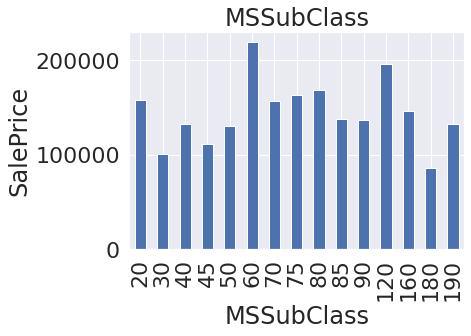

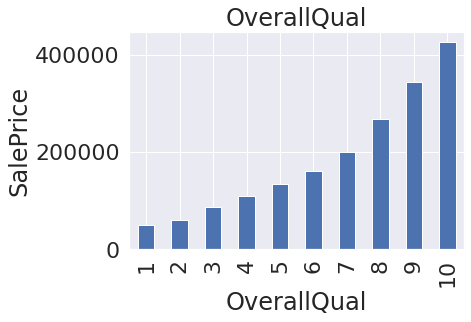

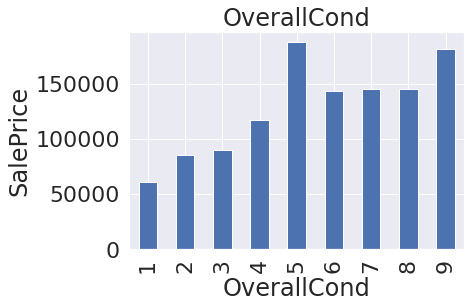

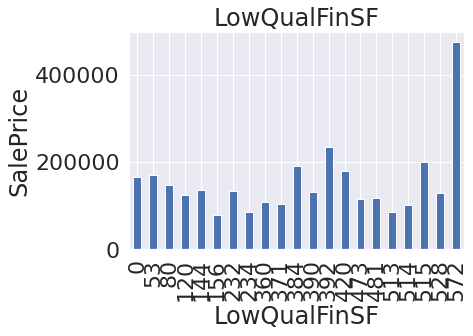

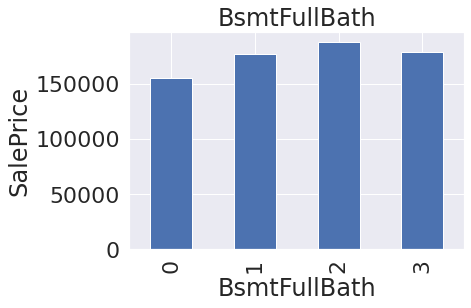

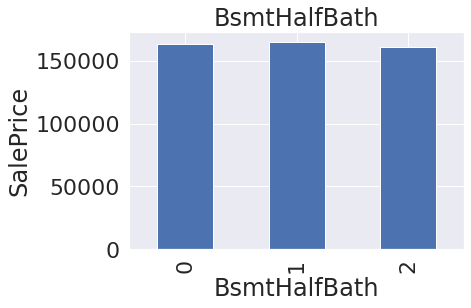

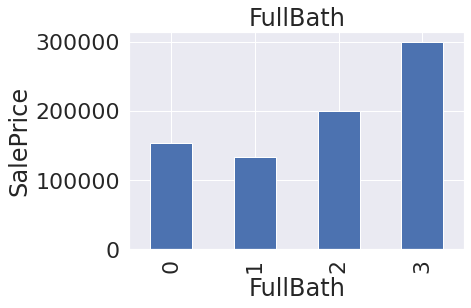

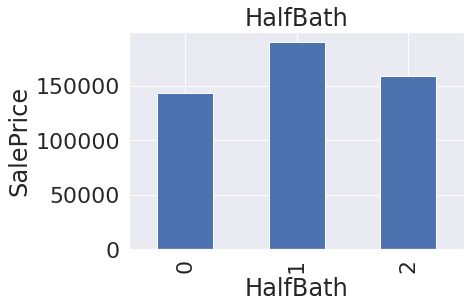

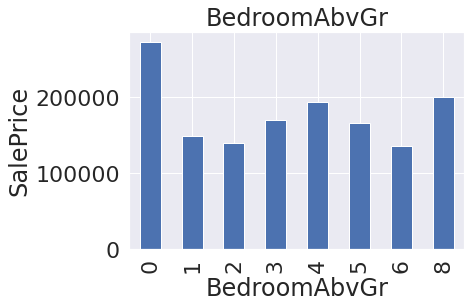

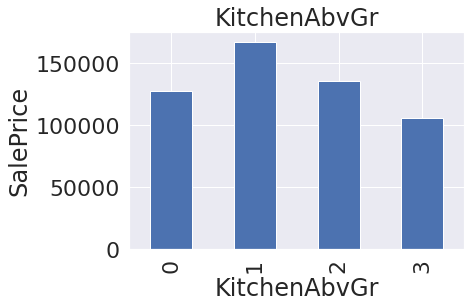

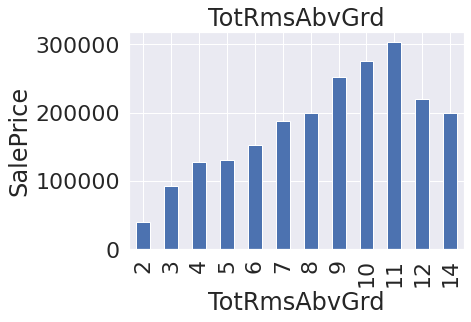

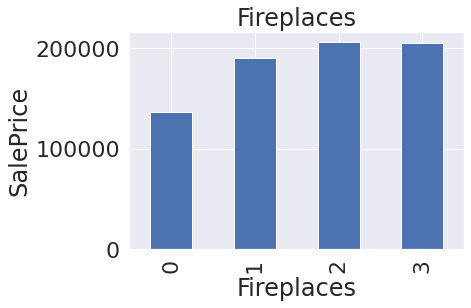

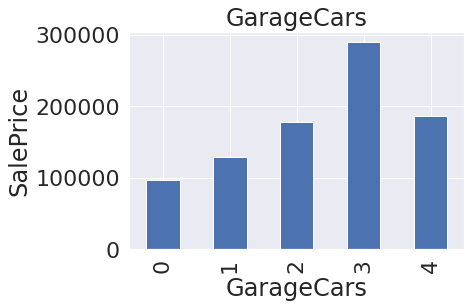

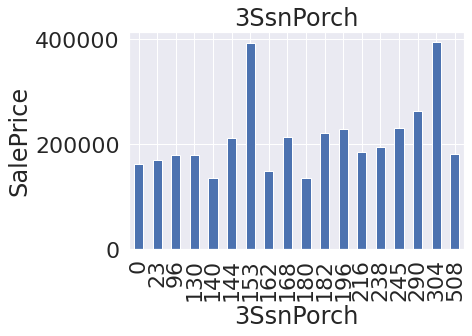

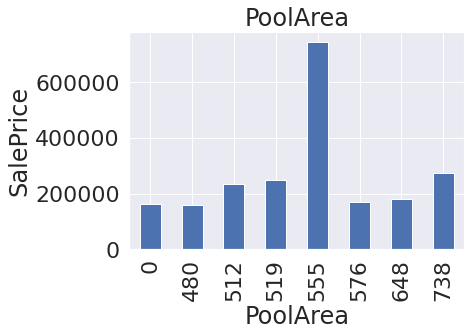

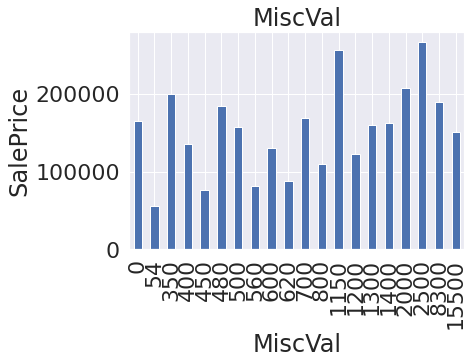

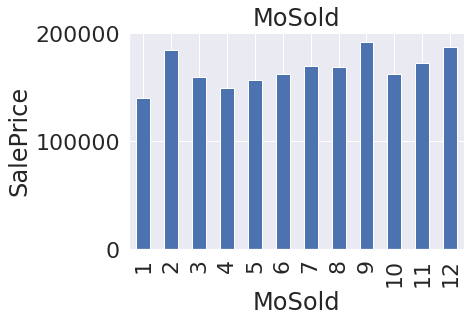

In [83]:
for features in descrete_num:
  data = df_train.copy()
  data.groupby(features)['SalePrice'].median().plot.bar()
  plt.xlabel(features)
  plt.ylabel('SalePrice')
  plt.title(features)
  plt.show()  

Plotting descrete categorical data

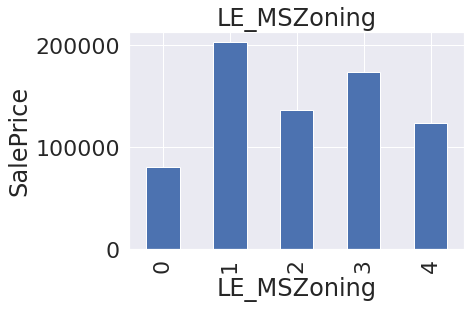

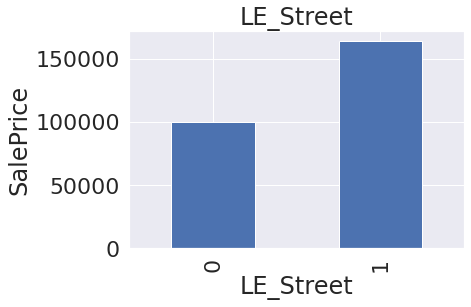

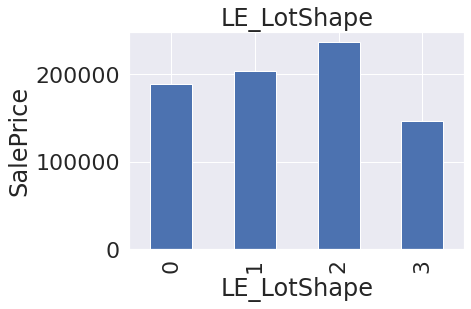

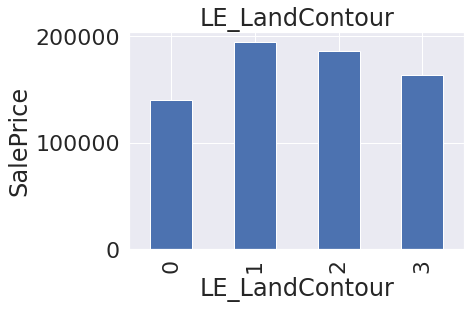

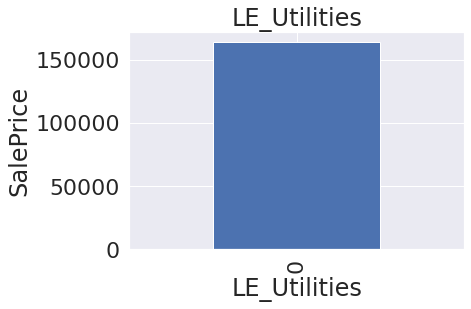

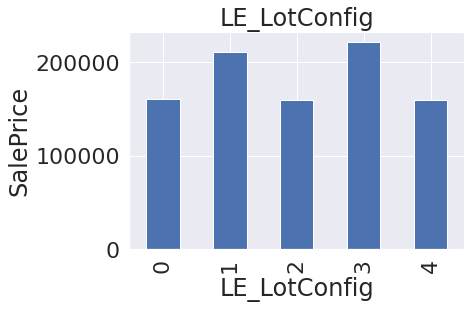

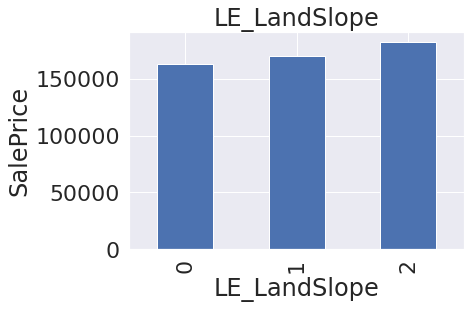

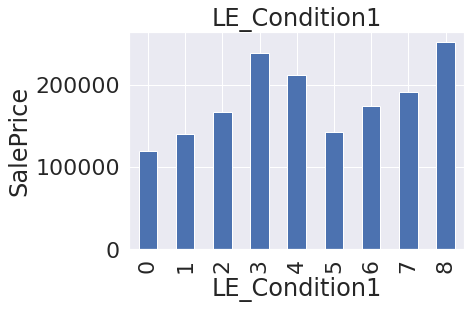

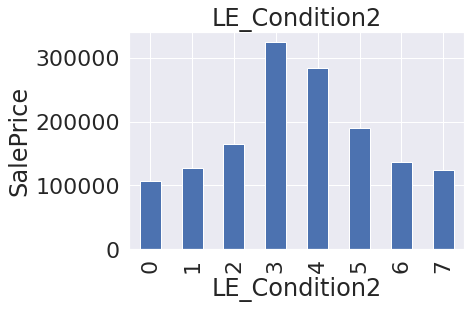

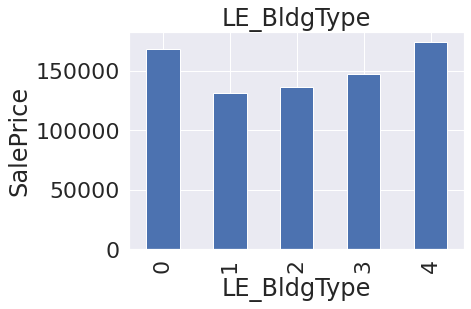

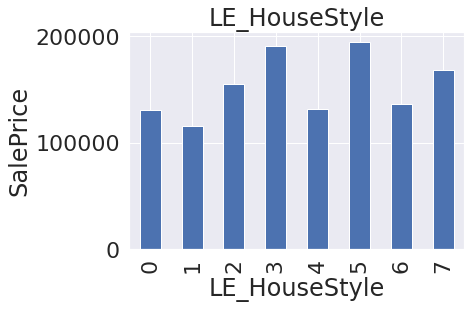

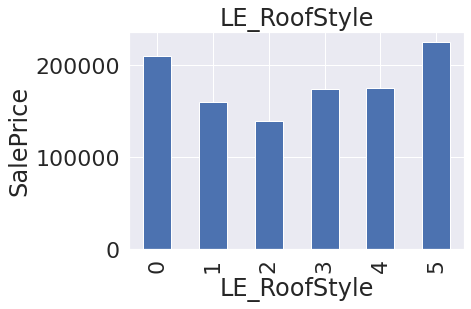

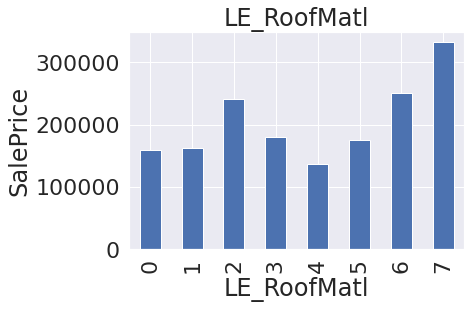

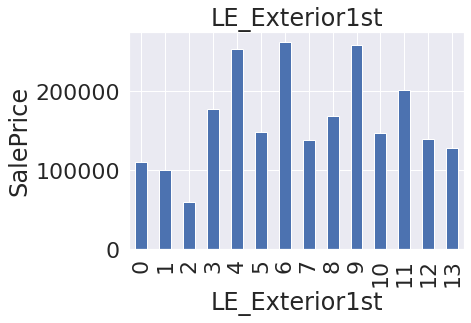

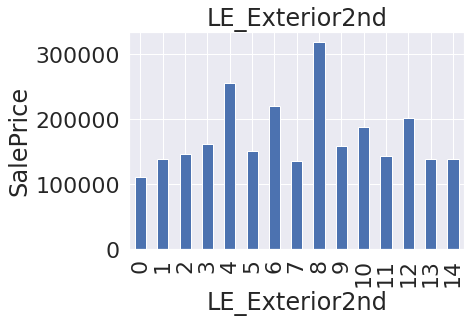

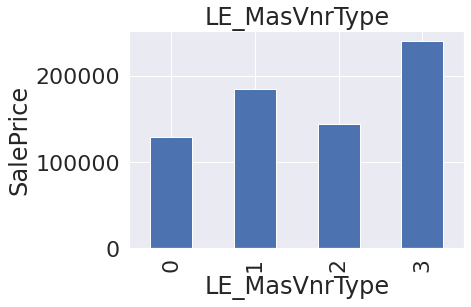

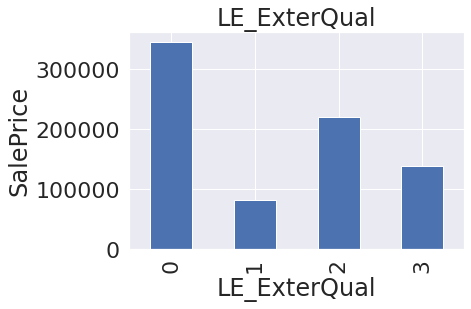

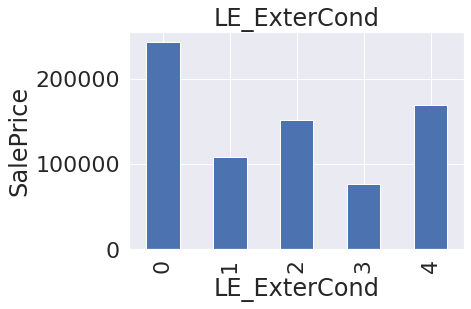

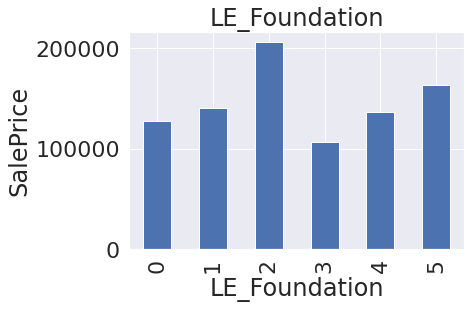

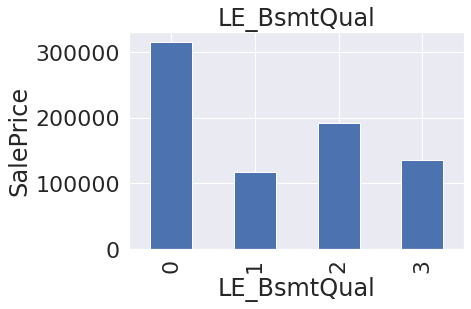

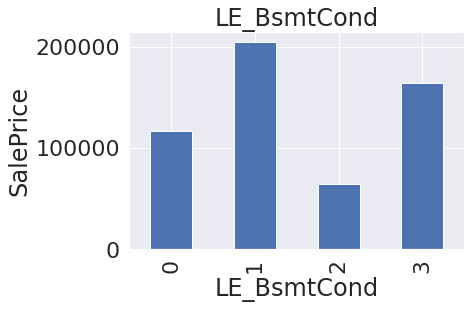

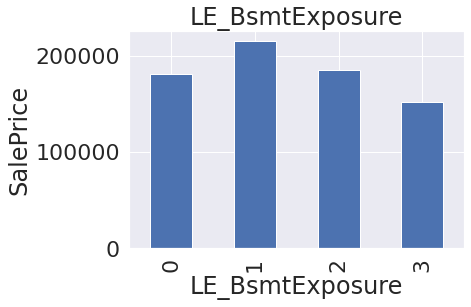

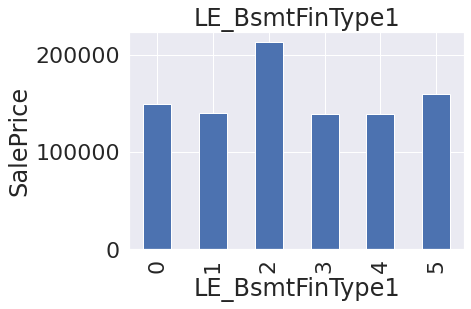

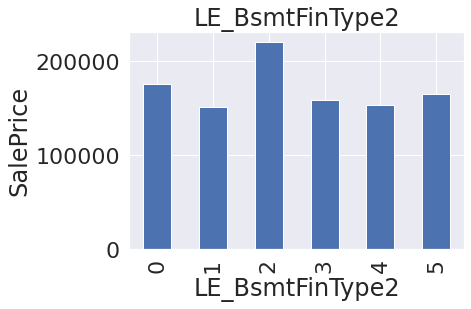

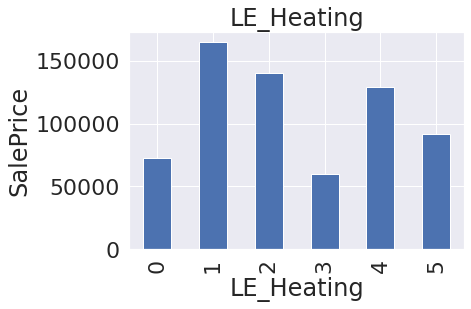

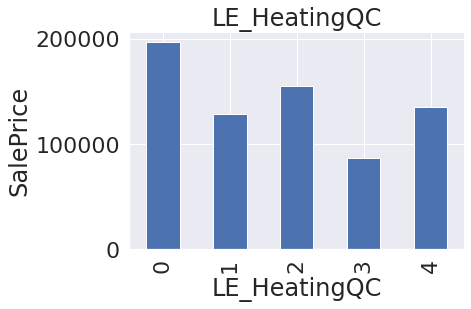

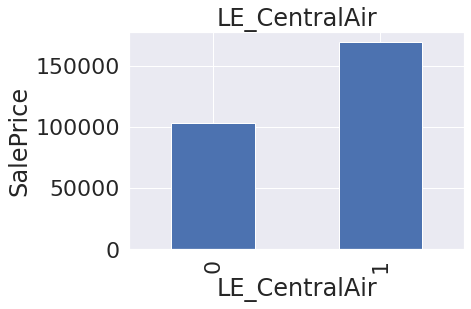

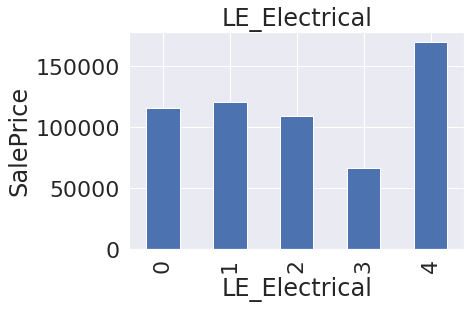

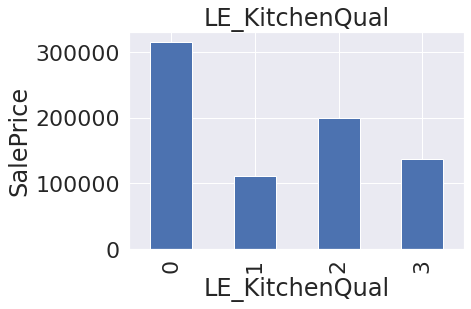

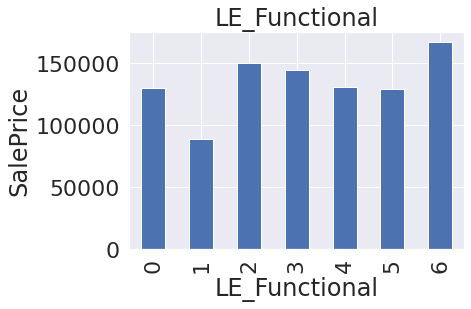

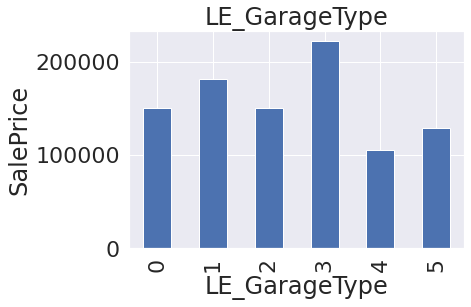

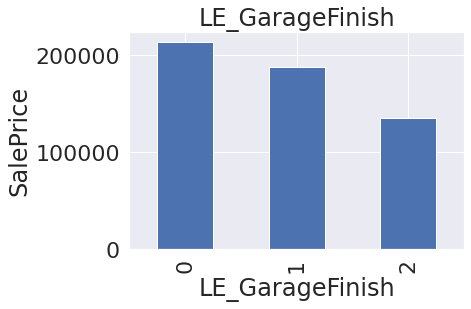

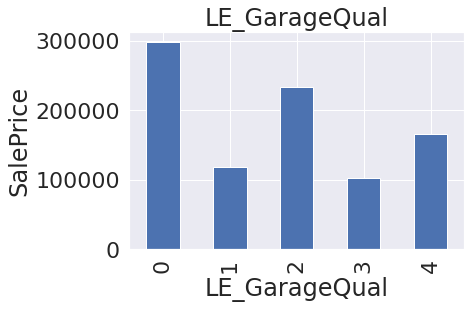

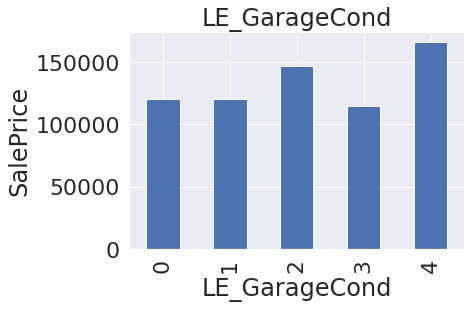

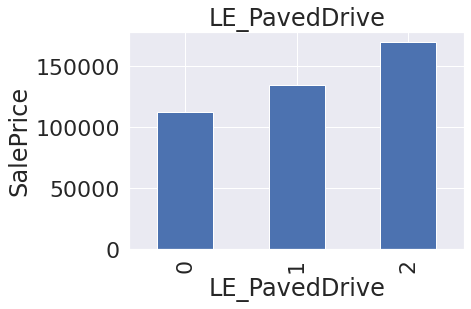

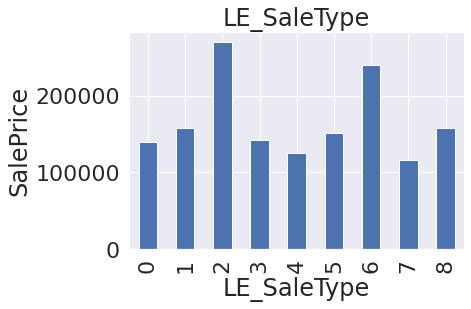

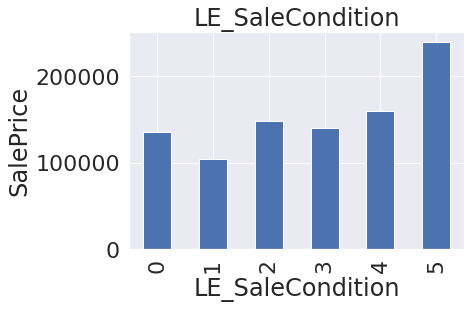

In [84]:
for features in descrete_object:
  data = df_train.copy()
  data.groupby(features)['SalePrice'].median().plot.bar()
  plt.xlabel(features)
  plt.ylabel('SalePrice')
  plt.title(features)
  plt.show()  

###### Continous Data

In [85]:
continous_features = [features for features in df_train.columns if len(df_train[features].unique())>25 and features not in year_features+['Id']]
print("Continous Varibales Count: {}".format(len(continous_features)))

Continous Varibales Count: 16


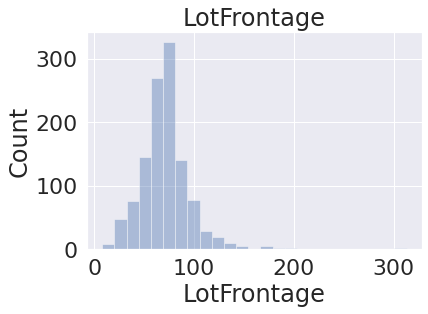

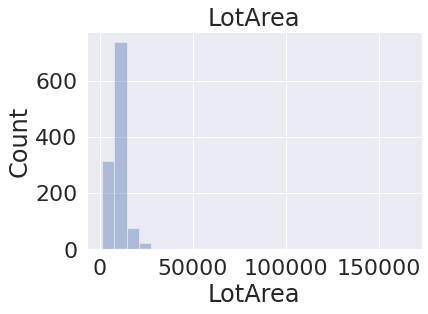

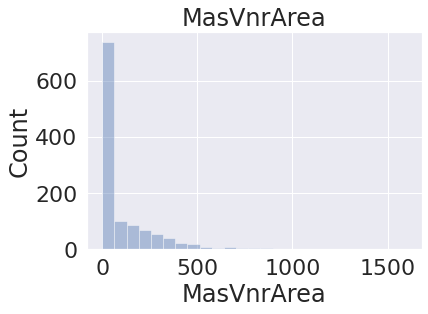

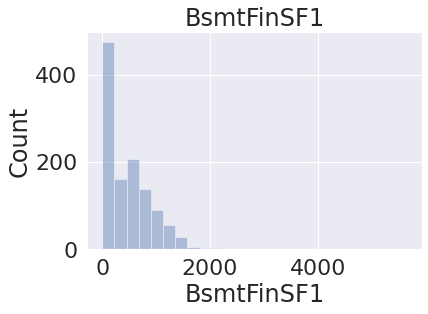

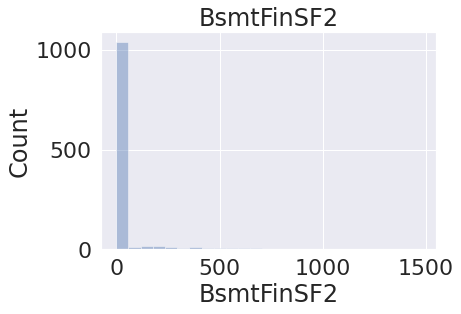

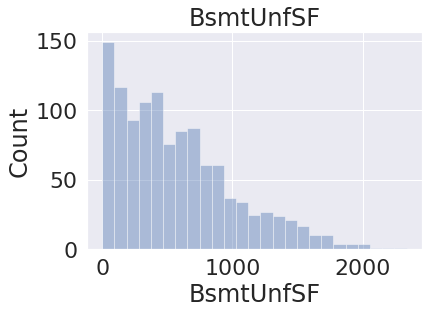

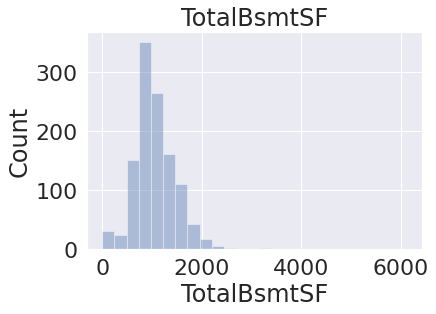

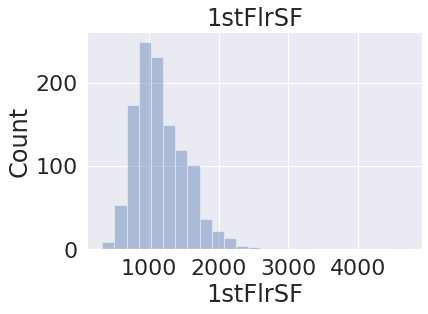

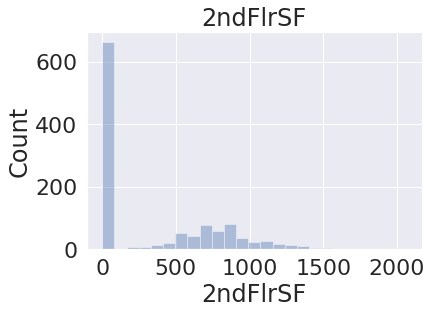

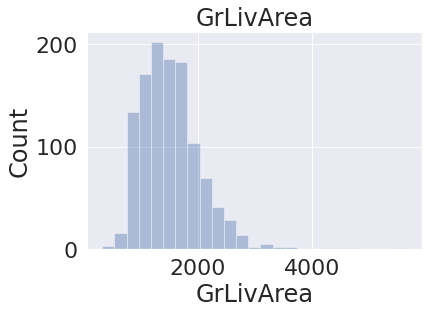

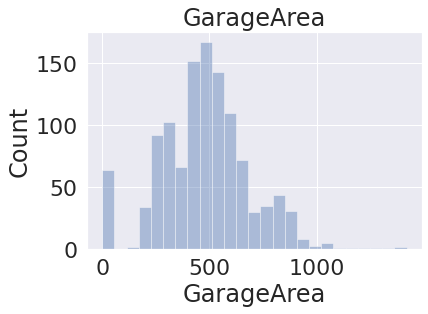

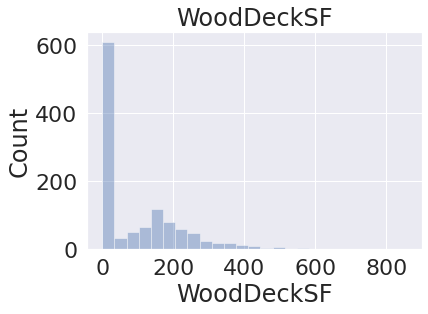

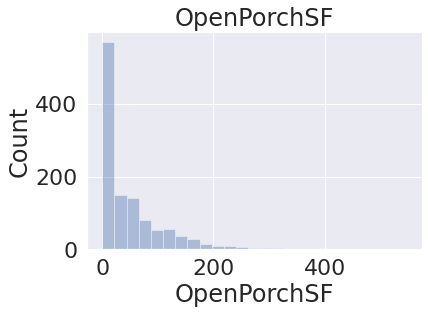

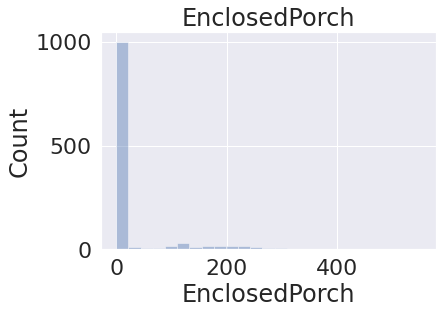

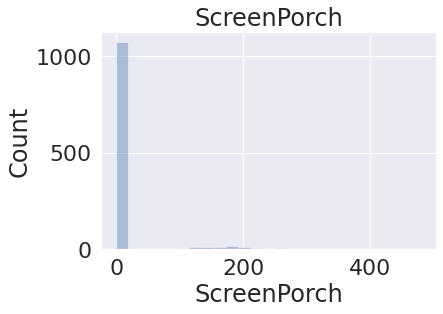

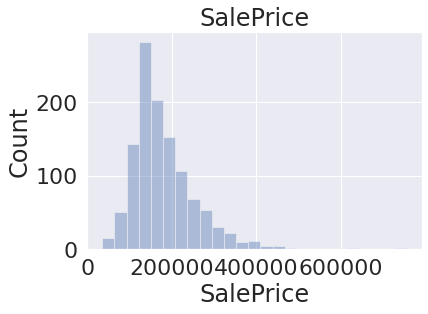

In [86]:
#displaying the histogram plot of the continous data

for features in continous_features:
    data = df_train.copy()
    sns.distplot(data[features],bins=25,kde=False)#.hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

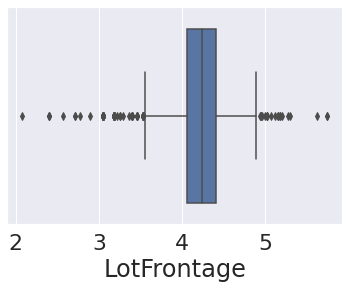

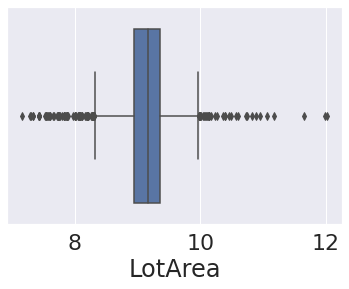

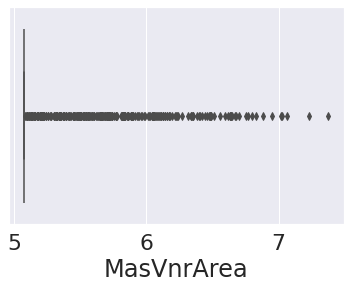

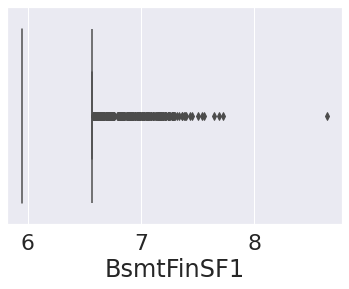

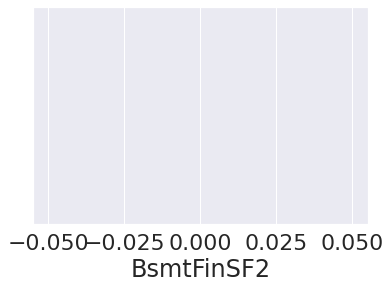

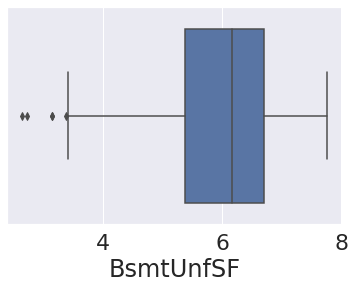

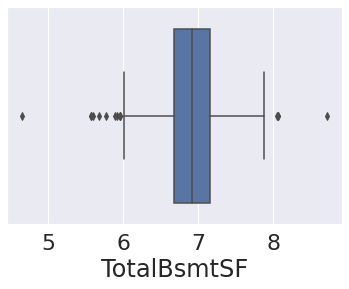

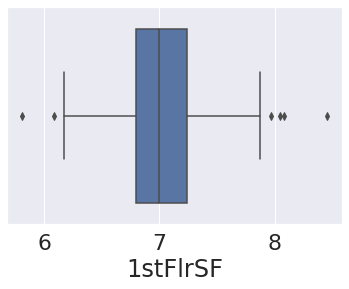

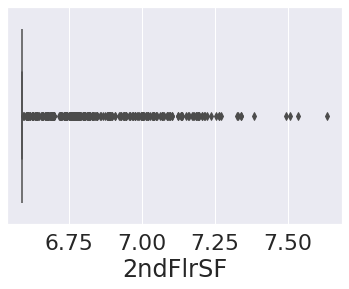

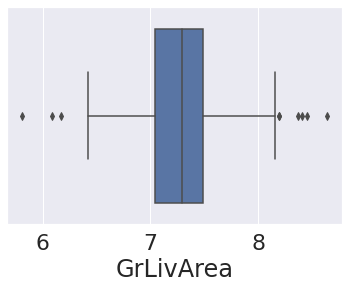

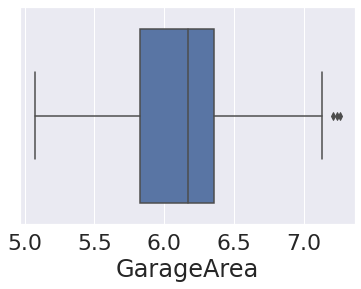

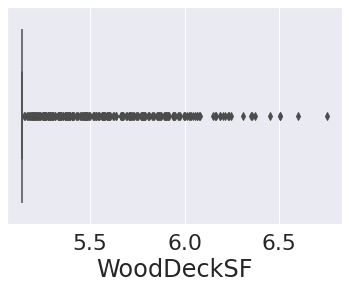

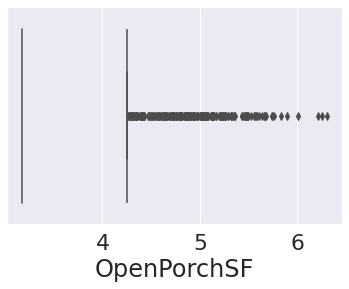

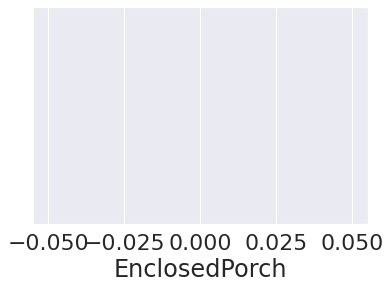

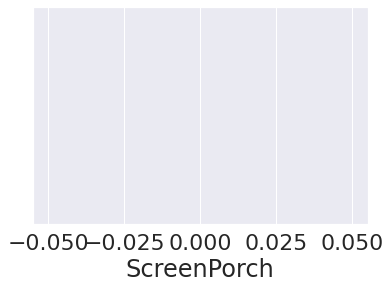

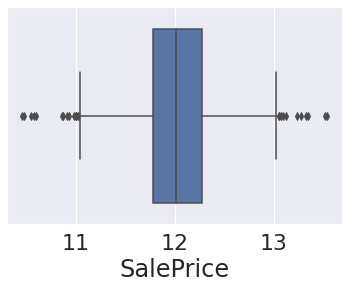

In [87]:
for i in continous_features:
  if 0 in data[features].unique():
    pass
  else:
    sns.boxplot(np.log(df_train[i]), orient='v')
    plt.show()

###### eda on time

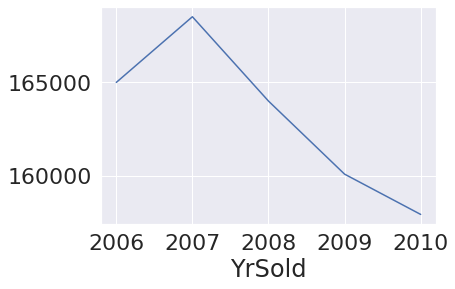

In [88]:
df_train.groupby('YrSold')['SalePrice'].median().plot()

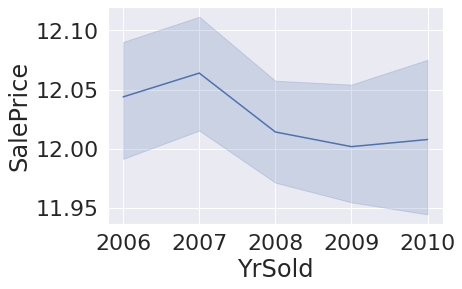

In [89]:
sns.lineplot(x = df_train[year_features[-1]], y= np.log(df_train['SalePrice']))
plt.show()

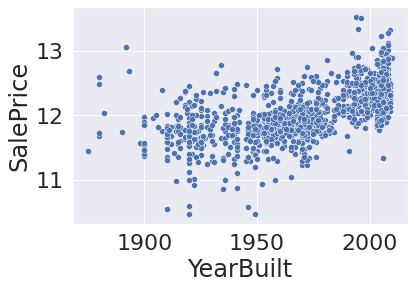

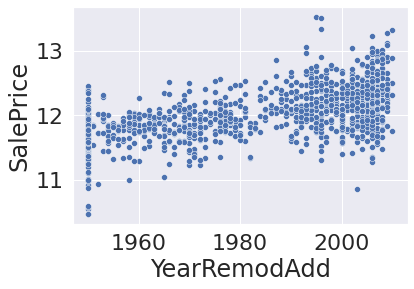

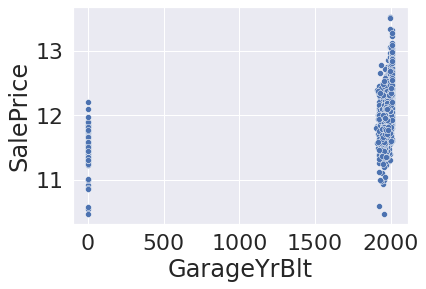

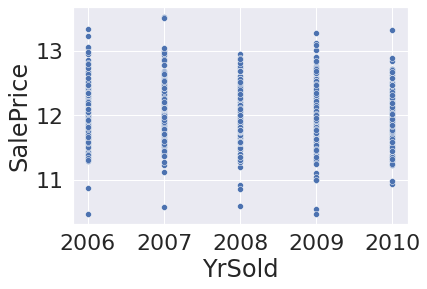

In [90]:
for yr in year_features:
  sns.scatterplot(x = df_train[yr], y = np.log(df_train['SalePrice']))
  plt.show()

In [91]:
sale = [i for i in df_train_backup.columns if 'ale' in i]
sale = df_train_backup[sale[0]].value_counts()

### Feature Engineering

### Spliting data

In [92]:
print('Train: ',df_train.shape,'\nTest: ',df_test.shape)

Train:  (1168, 75) 
Test:  (292, 74)


In [93]:
features = df_train.drop("SalePrice", axis=1)
targets = df_train["SalePrice"]

In [94]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error


import xgboost
from sklearn.linear_model import LinearRegression

xg = xgboost
lr = LinearRegression()



X, X_test, y, y_test = train_test_split(features,targets, test_size=0.2, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

lr.fit(X,y)
lr.score(X, y)

(934, 74)
(234, 74)
(934,)
(234,)


0.8511606029588547

Regression Models

In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [96]:
def model(m_name):
  m_name.fit(X, y)
  print('Score: ',m_name.score(X,y))
  pred = m_name.predict(X_test)
  RMSE = mean_squared_error(y_test, pred)
  return print('RMSE: ',RMSE)

In [97]:
model(lr)

Score:  0.8511606029588547
RMSE:  1595851589.8840244


In [98]:
knn = KNeighborsRegressor()
model(knn)

Score:  0.7590821310431314
RMSE:  2266522504.214872


In [99]:
svr = SVR()
model(svr)

Score:  -0.04437441807433151
RMSE:  6531896497.221094


In [100]:
dtr = DecisionTreeRegressor()
model(dtr)

Score:  1.0
RMSE:  2406237556.282051


In [101]:
rrf = RandomForestRegressor()
model(rrf)

Score:  0.9792729485988623
RMSE:  1369085608.5161915


In [102]:
GB = GradientBoostingRegressor()
model(GB)

Score:  0.9751356874576241
RMSE:  1204706287.910477


In [103]:
rs = 0
acc_max = 0

for i in range(20,1000):
  X, X_test, y, y_test = train_test_split(features,targets, test_size=0.3, random_state=i)
  lr.fit(X,y)
  acc = lr.score(X, y)
  pred = lr.predict(X_test)
  if acc_max < acc:
    acc_max = acc
    rs = i 

print('Accuracy Score: ',acc_max,'\nRS: ',rs)

Accuracy Score:  0.9175437596454324 
RS:  630


In [104]:
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

21178.234735399117
2957688771.1614738
54384.637271581334


####Feature Scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler
MX = MinMaxScaler()

MX.fit(X)
X_mx = MX.transform(X)
X_test_mx = MX.transform(X_test)

In [106]:
def model(m_name):
  m_name.fit(X_mx, y)
  print('Score: ',m_name.score(X_mx,y))
  pred = m_name.predict(X_test_mx)
  RMSE = mean_squared_error(y_test, pred)
  return print('RMSE: ',RMSE)

In [107]:
model(knn)

Score:  0.8285501569952725
RMSE:  1959785511.896524


In [108]:
model(rrf)

Score:  0.9848606628234693
RMSE:  1670035949.6596196


In [109]:
model(dtr)

Score:  1.0
RMSE:  3708154883.2649574


In [110]:
model(GB)

Score:  0.9784409627727035
RMSE:  2140164870.9680858


In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

gf = GradientBoostingRegressor(random_state=42)

loss = ['ls', 'lad', 'huber', 'quantile']
n_estimators = [100, 300, 500,700, 900, 1100, 1300]
min_samples_split = [2,3,4,6,8,10,12]
min_samples_leaf = [1,2,4,5,6,7,8]
max_depth =[2,3,4,5,6,7,8]
max_features = ["auto","sqrt","log2",None]

hyperparameter_grid = {"loss":loss,
                      "n_estimators":n_estimators,
                      "min_samples_split":min_samples_split,
                      "max_depth":max_depth,
                      "min_samples_leaf":min_samples_leaf,
                      "max_features":max_features}


random_cv = RandomizedSearchCV(estimator=gf, param_distributions = hyperparameter_grid, cv=5,
                              n_iter=30, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1,
                              return_train_score=True, random_state=42)

In [116]:
#fitting the model with random search CV
random_cv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 7,
                                                             8],
                                        'min_samples_split': [2, 3, 4, 6, 8, 10,
                                                              12],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300]},
                   random_state=42, return_train_score=True,
                   s

In [117]:
rand_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
rand_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
26,0.519842,0.011562,0.006868,0.000293,500,10,5,sqrt,3,ls,...,-16063.319681,1356.258694,1,-4262.908804,-4187.266334,-4179.070251,-4022.063105,-4168.981752,-4164.058049,78.386567
1,1.011111,0.006661,0.009375,0.000078,1300,6,5,log2,2,ls,...,-16322.093950,1056.124763,2,-4907.594673,-4623.467657,-4762.862214,-4789.697242,-4582.282571,-4733.180871,117.730661
29,5.104815,0.552349,0.008891,0.001562,1100,6,2,sqrt,3,lad,...,-16380.774224,559.711523,3,-5687.850414,-5666.930224,-5574.750277,-5541.627981,-5554.097662,-5605.051312,60.368265
15,1.230606,0.025351,0.005696,0.000233,300,6,6,sqrt,2,huber,...,-16532.566478,1011.398932,4,-10057.811759,-10153.522078,-9765.068991,-9760.330586,-9871.716711,-9921.690025,158.328504
10,0.962008,0.016926,0.009059,0.000519,1300,8,2,log2,2,ls,...,-16572.077286,684.700011,5,-4327.058148,-4379.887678,-4431.769267,-4507.948481,-4372.734603,-4403.879635,61.733822
4,0.137700,0.005475,0.005909,0.001042,100,12,2,log2,6,ls,...,-16586.573851,1107.211762,6,-4564.982598,-4280.338358,-4410.215623,-4397.855698,-4016.777839,-4334.034023,182.619165
17,1.465120,0.026502,0.015137,0.000259,1100,6,6,log2,6,ls,...,-16770.104348,1223.206214,7,-10.818614,-9.295849,-9.075096,-12.366313,-7.630342,-9.837243,1.618868
11,4.332428,0.013242,0.008040,0.000035,900,8,1,None,3,ls,...,-16791.781345,585.354851,8,-1078.179411,-1027.221769,-908.521750,-967.847087,-973.721381,-991.098280,57.531709
14,30.565026,0.733490,0.015872,0.000691,1100,6,2,None,7,lad,...,-16793.620291,1179.567221,9,-1078.063335,-927.350739,-1077.771611,-795.909929,-864.869247,-948.792972,113.333580
9,5.284530,0.034310,0.009319,0.000278,1100,4,8,auto,3,ls,...,-16927.262506,607.319399,10,-935.868409,-990.614529,-924.946779,-909.254199,-767.677725,-905.672328,74.234528


In [118]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='ls', max_features='sqrt', min_samples_leaf=5,
                          min_samples_split=10, n_estimators=500,
                          random_state=42)

In [122]:
trees_grid = {"n_estimators":[50,60,100,150,170,190,220,250,300,350,400],
             }

gf = GradientBoostingRegressor(criterion='friedman_mse',
                           loss='lad', max_depth=2,
                          max_features='sqrt',
                          min_impurity_decrease=0.0,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0,
                          random_state=42, subsample=1.0
                          )
grid_search = GridSearchCV(estimator=gf,
    param_grid=trees_grid,scoring="neg_root_mean_squared_error",n_jobs=-1,cv=10,verbose=1,
                           return_train_score=True)

In [124]:
grid_search.fit(X,y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=2,
                                                 max_features='sqrt',
                                                 min_samples_leaf=4,
                                                 min_samples_split=4,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 100, 150, 170, 190, 220, 250,
                                          300, 350, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

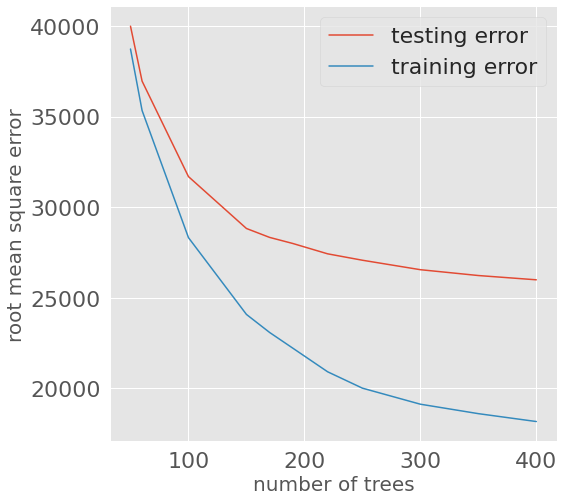

In [125]:
results = pd.DataFrame(grid_search.cv_results_)
figsize(8,8)
plt.style.use("ggplot")
plt.plot(results["param_n_estimators"], -1*results["mean_test_score"], label="testing error")
plt.plot(results["param_n_estimators"], -1*results["mean_train_score"], label="training error")
plt.legend()
plt.ylabel("root mean square error", size=20)
plt.xlabel("number of trees", size= 20)
plt.show()

In [126]:
default_model = GradientBoostingRegressor(random_state=42)
final_model = grid_search.best_estimator_
final_model

GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=400, random_state=42)

In [127]:
default_model.fit(X,y)

GradientBoostingRegressor(random_state=42)

In [128]:
final_model.fit(X,y)

GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=400, random_state=42)

In [129]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

In [131]:
print("the default model performance on the test set: rsme = %0.4f"  %np.sqrt(mean_squared_error(y_test,default_pred)))
print("the final model performance on the test set: rsme = %0.4f" %np.sqrt(mean_squared_error(y_test,final_pred)))

the default model performance on the test set: rsme = 45635.7496
the final model performance on the test set: rsme = 43665.0138


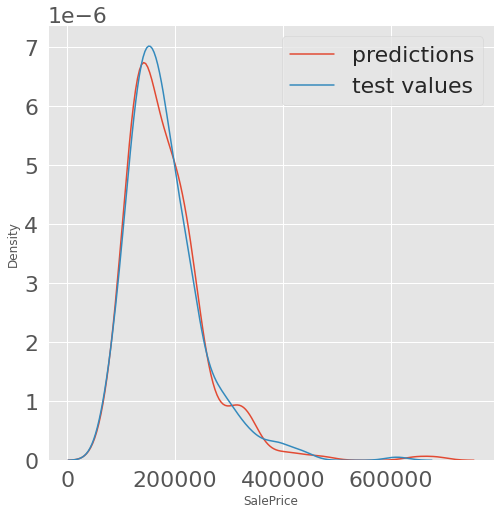

In [138]:

figsize(8,8)
sns.kdeplot(final_pred, label= "predictions")
sns.kdeplot(y_test, label= "test values")
plt.legend()
plt.show()

In [135]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(final_model, 'baseball.obj')
pickle.dump(final_model,open('baseball.pkl','wb'))